### 2.2 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['label']=iris_label
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2,  random_state = 11)

In [14]:
dt_clf = DecisionTreeClassifier(random_state =11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [16]:
pred = dt_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9333333333333333


### 2.3 사이킷런의 내장 예제 데이터

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [23]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
print(iris_data.DESCR)
print(type(iris_data.DESCR))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris_data.data)
print(type(iris_data.data))

### 2.4  Model Selection 모듈 소개

#### 학습/테스트 데이터 셋 분리 - train_test_split()

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(iris.data, iris.target)
pred = dt_clf.predict(iris.data)
print('정확도: ', accuracy_score(iris.target,pred))

정확도:  1.0


In [7]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                   iris.target,
                                                   test_size=0.3,
                                                   random_state=121 )

In [6]:
y_train

array([2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [7]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


#### 넘파이 ndarray 뿐만 아니라 판다스 DataFrame/Series도 train_test_split( )으로 분할 가능

In [1]:
import pandas as pd

In [5]:
iris_feature = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_target = pd.DataFrame(iris.target)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_feature,
                                                   iris_target,
                                                   test_size=0.3,
                                                   random_state=121)


In [11]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('{:.3f}'.format(accuracy_score(y_test,pred)))

0.956


#### 교차검증
- kfold

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [16]:
iris = load_iris()
feature = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('size of iris feature: ', feature.shape[0])


size of iris feature:  150


In [17]:
n_iter = 0

for train_index, test_index in kfold.split(feature):
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- stratified kfold

In [18]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['label']=iris.target
iris_df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [26]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
i = 0

for train_index, test_index in kfold.split(iris_df):
    i += 1
    label_train = iris_df.label.iloc[train_index]
    label_test = iris_df.label.iloc[test_index]
    print('## 교차 검증: ', i)
    print('train label distridution: \n',
         label_train.value_counts())
    print('test label distridution: \n',
         label_test.value_counts())
    print()
    
    

## 교차 검증:  1
train label distridution: 
 2    50
1    50
Name: label, dtype: int64
test label distridution: 
 0    50
Name: label, dtype: int64

## 교차 검증:  2
train label distridution: 
 2    50
0    50
Name: label, dtype: int64
test label distridution: 
 1    50
Name: label, dtype: int64

## 교차 검증:  3
train label distridution: 
 1    50
0    50
Name: label, dtype: int64
test label distridution: 
 2    50
Name: label, dtype: int64



In [30]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df,iris_df.label):
    n_iter += 1
    label_train = iris_df.label.iloc[train_index]
    label_test = iris_df.label.iloc[test_index]
    print('## 교차 검증: ', n_iter)
    print('train label distridution: \n',
         label_train.value_counts())
    print('test label distridution: \n',
         label_test.value_counts())
    print()
    


## 교차 검증:  1
train label distridution: 
 2    34
1    33
0    33
Name: label, dtype: int64
test label distridution: 
 1    17
0    17
2    16
Name: label, dtype: int64

## 교차 검증:  2
train label distridution: 
 1    34
2    33
0    33
Name: label, dtype: int64
test label distridution: 
 2    17
0    17
1    16
Name: label, dtype: int64

## 교차 검증:  3
train label distridution: 
 0    34
2    33
1    33
Name: label, dtype: int64
test label distridution: 
 2    17
1    17
0    16
Name: label, dtype: int64



In [40]:
features = iris.data
label = iris.target
type(features)

numpy.ndarray

In [51]:
dt_clf = DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
n = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    
    n+=1
    
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = label[train_index],label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred),4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
    
    
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 
    


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


- cross_val_score()

In [54]:
from sklearn.model_selection import cross_val_score

features = iris.data
label = iris.target

scores = cross_val_score(dt_clf, features, label,
                        scoring = 'accuracy',
                        cv=3)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- GridSearchCV

In [56]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size=0.2,
                                                   random_state=121)
dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [58]:
from sklearn.model_selection import GridSearchCV

grid_dtree = GridSearchCV(dtree, param_grid = parameters, 
                         cv=3, refit=True,
                         return_train_score=True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [66]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

pred = grid_dtree.predict(X_test)
print(accuracy_score(y_test, pred))

esti = grid_dtree.best_estimator_
print(accuracy_score(y_test, esti.predict(X_test)))



{'max_depth': 3, 'min_samples_split': 2}
0.975
0.9666666666666667
0.9666666666666667


### 데이터 전처리

- 레이블 인코딩

In [67]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고','전자렌지',
        '컴퓨터','선풍기','선풍기',
        '믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


In [69]:
dir(encoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'classes_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [72]:
print(encoder.classes_)
print(encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- one-hot encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)

ohencoder = OneHotEncoder()
ohencoder.fit(labels)
oh_labels = ohencoder.transform(labels)

print(oh_labels.toarray())


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [76]:
import pandas as pd
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

- StandardScaler

In [81]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns = iris.feature_names)

print(iris_scaled_df.mean())
print(iris_scaled_df.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- MinMaxScaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled,columns = iris.feature_names)

print(iris_scaled_df.min())
print(iris_scaled_df.max())


sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('../train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [87]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [90]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [97]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [98]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [101]:
titanic_df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [105]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

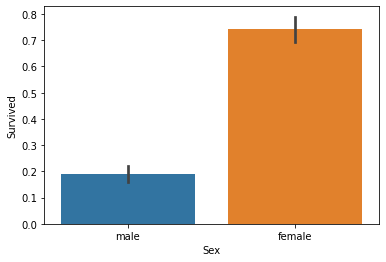

In [106]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

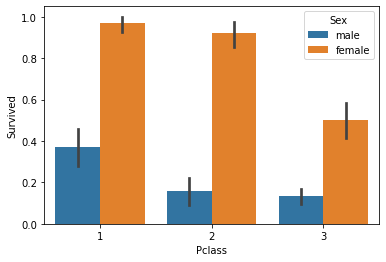

In [107]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [108]:
def get_category(age):
    if age <= -1: cat='unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat = 'Elderly'
        
    return cat

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df.Age.apply(lambda x:get_category(x))


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

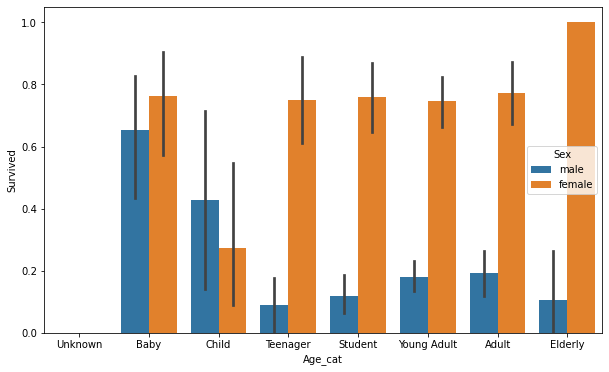

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',order=group_names,data=titanic_df)

In [111]:
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [114]:
from sklearn import preprocessing

def encode_feature(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le= le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_feature(titanic_df)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [120]:
titanic_df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [121]:
feature = titanic_df.drop('Survived',axis=1)
label = titanic_df['Survived']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=11)

In [126]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
print(np.round(accuracy_score(y_test,dt_clf.predict(X_test)),4))

0.7877


In [128]:
# cross_val_score

scores = cross_val_score(dt_clf, feature, label, cv=5)
scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [132]:
# GridValSearch

par = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],
      'min_samples_leaf':[1,5,8]}
grid_dt_clf = GridSearchCV(dt_clf,param_grid=par, scoring='accuracy',refit=True, return_train_score=True,cv=5)
grid_dt_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             return_train_score=True, scoring='accuracy')

In [135]:
print(accuracy_score(y_test,grid_dt_clf.predict(X_test)))
print(accuracy_score(y_test,grid_dt_clf.best_estimator_.predict(X_test)))

0.8715083798882681
0.8715083798882681
